Intercept: 264.8688828549873
Coefficients: [ 142.39127028 -276.9220174  -108.44306266  462.27055046 -228.7791586 ]
Root mean square error: 21.6076716947388


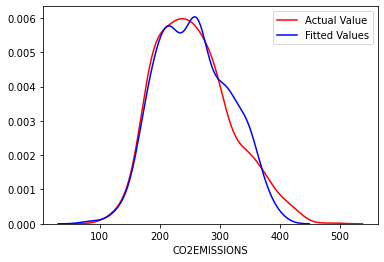

In [32]:
#predicting how much CO2 a car will emit based on it's engine-size amd fuel consumption
import pandas as pd 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math

csv_path='Documents\FuelConsumption.csv'
df=pd.read_csv(csv_path)
df.to_csv('Documents\FuelConsumption2.csv')

#print(df.info())

#value count in fuel type column
fuel_type_counts=df['FUELTYPE'].value_counts()
y=fuel_type_counts.rename_axis('FUELTYPE').to_frame('value_counts')
#print(y)


#turning categorical variable into quantitative variable
dummy=pd.get_dummies(df['FUELTYPE'])
df=pd.concat([df,dummy],axis=1)
df.to_csv('Documents\FuelConsumption2.csv')

#dropping some of the columns of the categorical variables
df.drop('D', axis=1, inplace=True)
df.drop('Z', axis=1, inplace=True)
df.drop('E', axis=1, inplace=True)

# rename the X column
df.rename(columns={'X': 'Fuel Type'}, inplace=True)

#Normalization
df['ENGINESIZE']=df['ENGINESIZE']/df['ENGINESIZE'].max()
df['FUELCONSUMPTION_CITY']=df['FUELCONSUMPTION_CITY']/df['FUELCONSUMPTION_CITY'].max()
df['FUELCONSUMPTION_HWY']=df['FUELCONSUMPTION_HWY']/df['FUELCONSUMPTION_HWY'].max()
df['FUELCONSUMPTION_COMB']=df['FUELCONSUMPTION_COMB']/df['FUELCONSUMPTION_COMB'].max()
df['FUELCONSUMPTION_COMB_MPG']=df['FUELCONSUMPTION_COMB_MPG']/df['FUELCONSUMPTION_COMB_MPG'].max()
df.to_csv('Documents\FuelConsumption2.csv')


#regression plots for each independent variable
#checking strength of correlation
#sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=df)
#plt.ylim(0,)

#sns.regplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=df)
#plt.ylim(0,)

#sns.regplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=df)
#plt.ylim(0,)

#sns.regplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=df)
#plt.ylim(0,)

#sns.regplot(x='FUELCONSUMPTION_COMB_MPG',y='CO2EMISSIONS',data=df)
#plt.ylim(0,)

#sns.regplot(x='Fuel Type',y='CO2EMISSIONS',data=df)
#plt.ylim(0,) #weak correlation

#Linear Regression
lm=LinearRegression()
X=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y=df['CO2EMISSIONS']
lm.fit(X,Y)
Yhat=lm.predict(X)

#finding the intercept
print('Intercept:',lm.intercept_)

#finding coefficients
print('Coefficients:',lm.coef_)

#model evaluation
#distribution plot
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

#root mean square error
actual = df['CO2EMISSIONS']
predicted =Yhat
mse = sklearn.metrics.mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)
print('Root mean square error:',rmse)






